In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [123]:
import dask
import dask.dataframe as dd
df = dd.read_csv('cleaned_ds.csv')

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.array as da

## Statistics

- Klassenvariablen --> Balkendiagramm
- Balkendiagramm für 2 Zustände

In [26]:
category_vars = ["Label", "Protocol", "Fwd PSH Flags", "Bwd PSH Flags", "FIN Flag Cnt", "SYN Flag Cnt", "RST Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "URG Flag Cnt", "CWE Flag Count", "ECE Flag Cnt"]
object_vars = ['Dst IP', 'Flow ID', 'Src IP', 'Timestamp'] #df.select_dtypes(include=['object']).columns
continuous_vars = df.columns[~df.columns.isin(category_vars) & ~df.columns.isin(object_vars)]

In [119]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1739476,172.31.69.25-18.219.193.20-80-37882-6,18.219.193.20,37882,172.31.69.25,80,6,16/02/2018 11:27:29 PM,8660,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,230.946882,8660.000000,0.000000,8660.0,8660.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,32,32,115.473441,115.473441,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,1822666,172.31.69.28-18.219.9.1-80-63287-6,172.31.69.28,80,18.219.9.1,63287,6,22/02/2018 12:13:52 AM,5829,4,3,935.0,298.0,935.0,0.0,233.75,467.5,298.0,0.0,99.333333,172.050380,211528.564076,1200.892091,971.500000,2104.124973,5260.0,7.0,5822.0,1940.666667,3119.411857,5541.0,46.0,5540.0,2770.0,3521.391770,5260.0,280.0,0,0,92,72,686.224052,514.668039,0.0,935.0,154.125,332.306415,110427.553571,0,1,0,0,0,0,1,1,0.0,176.142857,233.75,99.333333,4,935,3,298,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,905739,172.31.69.28-52.14.136.135-80-63095-6,52.14.136.135,63095,172.31.69.28,80,6,22/02/2018 12:14:02 AM,3396,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,588.928151,3396.000000,0.000000,3396.0,3396.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,294.464075,294.464075,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,1143064,172.31.69.28-18.216.200.189-80-52341-6,18.216.200.189,52341,172.31.69.28,80,6,22/02/2018 12:28:04 AM,2390,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,836.820084,2390.000000,0.000000,2390.0,2390.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,20,20,418.410042,418.410042,0.0,0.0,0.000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,1934016,172.31.69.28-18.218.55.126-80-57459-6,172.31.69.28,80,18.218.55.126,57459,6,22/02/2018 12:19:45 AM,17362,4,3,935.0,314.0,935.0,0.0,233.75,467.5,314.0,0.0,104.666667,181.287985,71938.716738,403.179357,2893.666667,6770.577661,16711.0,7.0,17355.0,5785.000000,9779.680414,17077.0,38.0,17074.0,8537.0,11559.781659,16711.0,363.0,0,0,92,72,230.388204,172.791153,0.0,935.0,156.125,333.342568,111117.267857,0,1,0,0,0,0,1,1,0.0,178.428571,233.75,104.666667,4,935,3,314,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [86]:
df.describe().compute()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06,7.586821e+06
mean,3.516415e+06,4.187648e+04,1.014564e+04,9.078994e+00,1.173294e+07,1.318485e+01,6.632074e+00,6.329657e+02,5.251213e+03,2.204784e+02,1.191080e+01,5.817079e+01,8.263923e+01,3.585830e+02,2.854470e+01,1.154850e+02,1.315243e+02,inf,inf,2.234677e+06,1.139100e+06,5.339250e+06,1.735090e+06,1.111605e+07,2.498163e+06,1.169156e+06,4.835744e+06,1.787274e+06,8.457139e+06,1.023662e+06,1.084376e+06,3.158580e+06,3.519384e+05,4.816115e-02,3.713413e-03,1.730235e+02,1.411796e+02,2.634506e+04,6.979283e+03,1.206388e+01,4.098942e+02,8.223633e+01,1.276982e+02,4.483627e+04,1.392059e-02,9.551286e-02,1.562270e-01,3.083185e-01,3.405124e-01,3.219109e-02,2.860447e-02,1.834511e-01,6.262659e-01,9.504708e+01,5.817079e+01,1.154850e+02,1.318485e+01,6.329657e+02,6.632074e+00,5.251213e+03,4.017924e+03,1.007768e+04,9.405805e+00,1.239946e+01,2.229720e+05,1.142998e+05,3.350223e+05,1.461083e+05,4.146693e+06,1.669314e+05,4.285304e+06,3.991484e+06
std,2.327079e+06,2.316862e+04,2.000359e+04,5.093341e+00,3.071381e+07,1.011374e+03,3.245837e+02,3.160038e+04,6.985428e+05,3.276551e+02,2.414696e+01,7.217231e+01,1.386211e+02,5.183062e+02,5.198122e+01,1.686335e+02,2.064946e+02,inf,inf,1.045989e+07,3.911506e+06,1.532578e+07,1.036612e+07,3.053991e+07,1.063632e+07,4.404189e+06,1.495844e+07,1.045376e+07,2.683536e+07,4.867193e+06,3.996424e+06,1.114311e+07,4.242013e+06,2.141066e-01,6.082454e-02,9.209112e+03,6.493334e+03,1.999975e+05,6.031190e+04,2.154490e+01,5.426161e+02,1.051269e+02,1.689066e+02,2.292752e+05,1.171615e-01,2.939220e-01,3.630704e-01,4.617989e-01,4.738816e-01,1.765073e-01,1.666921e-01,3.870360e-01,1.189875e+00,1.094332e+02,7.217231e+01,1.686335e+02,1.011374e+03,3.160038e+04,3.245837e+02,6.985428e+05,9.589230e+03,2.118805e+04,9.853431e+02,8.509344e+00,2.976721e+06,1.813593e+06,3.944567e+06,2.503289e+06,1.421649e+07,1.755038e+06,1.452316e+07,1.405459e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.00

In [29]:
corr = df[continuous_vars].corr().compute()

c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\dask\dataframe\core.py:6004: RuntimeWarning: invalid value encountered in subtract
  np.subtract(df.iloc[:, idx].values[:, None], mu[idx][None, :]) ** 2
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X 

In [97]:
corr.to_csv("corr.csv")

<AxesSubplot:>

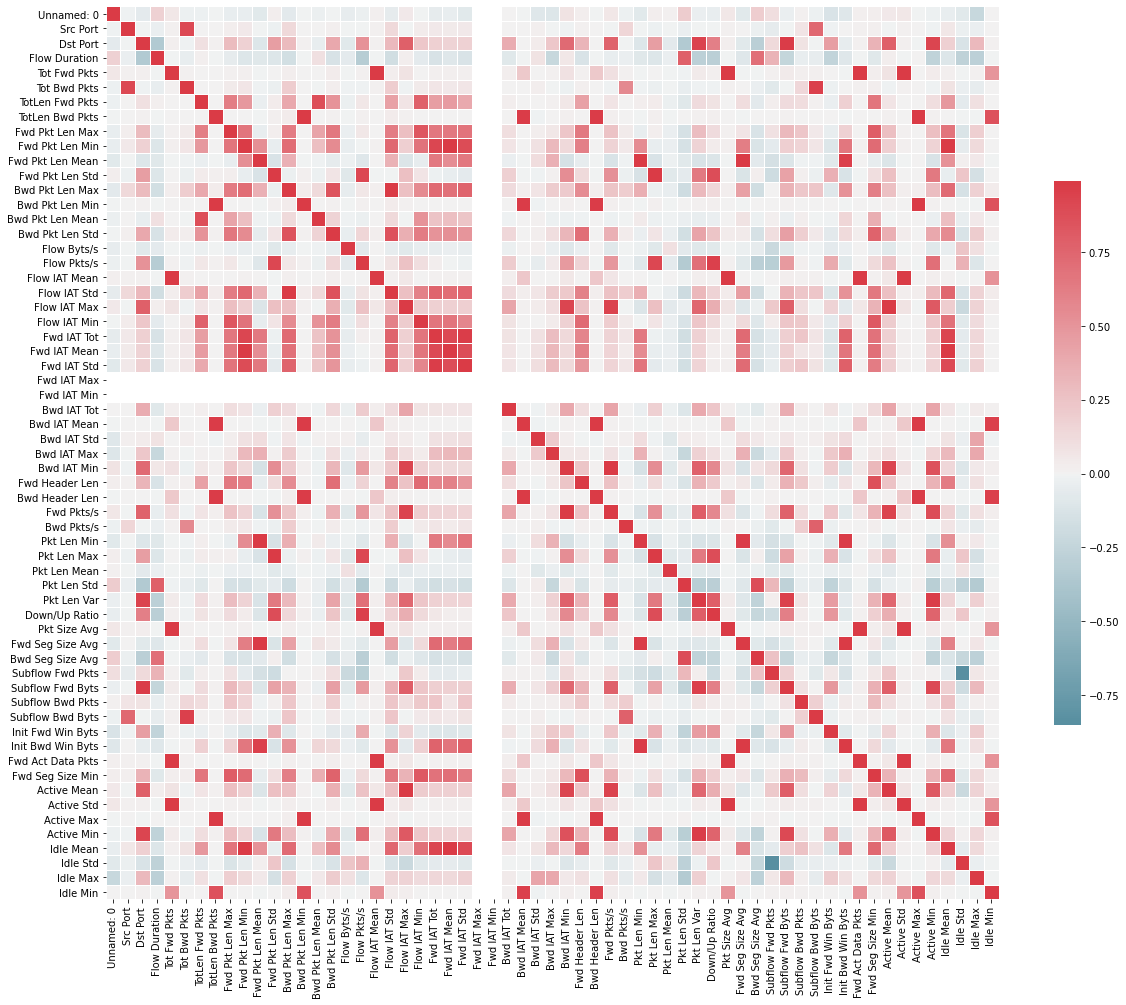

In [38]:
fig, ax = plt.subplots(figsize=(20,20))    
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=0.99, center=0, cmap=cmap, square=True, linewidths=1, cbar_kws={"shrink":.5}, ax=ax)

In [75]:
corr_unstack = corr.unstack()
# corr_unstack[(np.abs(corr_unstack) > 0.8) & (corr_unstack < 0.999999999999)].abs().sort_values(ascending=False)

In [122]:
df[["Protocol", "Label", "Pkt Len Std"]].head()

,Protocol,Label,Pkt Len Std
0,0.000000,ddos,6
1,332.306415,ddos,6
2,0.000000,ddos,6
3,0.000000,ddos,6
4,333.342568,ddos,6


In [ ]:
sns.set()
df.set_index('App').T.plot(kind='bar', stacked=True)

In [115]:
values = df[category_vars[0:3]].value_counts().compute()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [145]:
val = round(values/sum(values),4)
ddos_val = val

0.829

AttributeError: 'bool' object has no attribute 'all'

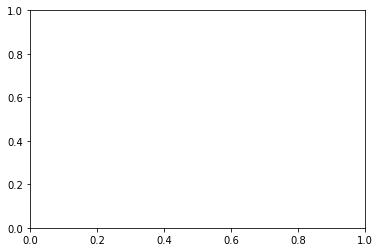

In [156]:
ax = plt.subplots()
ax = sns.barplot( y=1)
ax = sns.barplot(y=val.values[1])
plt.show()

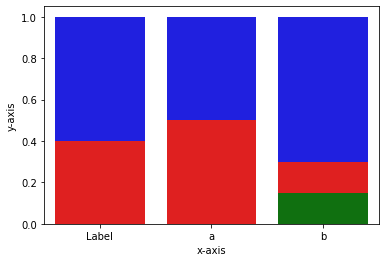

In [176]:
df1 = pd.DataFrame({
    'X': ["Label", "a", "b"],
    'Y': [1, 1, 1],
    'Z': [0.4, 0.5, 0.3],
    'a': [0, 0, 0.15],
})
  
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=df1["X"], y=df1["Y"], color='b')
ax = sns.barplot(x=df1["X"], y=df1["Z"], color='r')
ax = sns.barplot(x=df1["X"], y=df1["a"], color='g')
ax.set(xlabel="x-axis", ylabel="y-axis")




# visulaizing illustration
plt.show()

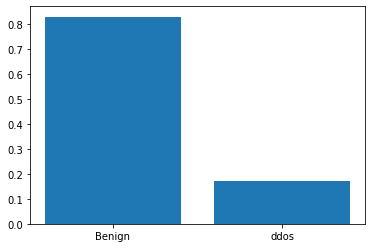

In [136]:
fig, ax = plt.subplots()
plt.bar(val.index, values)
plt.show()

In [112]:
df[category_vars].apply(pd.value_counts, axis=1).compute()

ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   [0, 6, 17, 'ddos']
  Missing: ['foo']

In [180]:
for c in category_vars:
    values = df[c].value_counts().compute()
    values = round(values/sum(values),4)
    print(c, values)

Label Benign    0.829
ddos      0.171
Name: Label, dtype: float64
Protocol 6     0.6958
17    0.2889
0     0.0153
Name: Protocol, dtype: float64
Fwd PSH Flags 0    0.9541
1    0.0459
Name: Fwd PSH Flags, dtype: float64
Bwd PSH Flags 0    0.9963
1    0.0037
Name: Bwd PSH Flags, dtype: float64
FIN Flag Cnt 0    0.986
1    0.014
Name: FIN Flag Cnt, dtype: float64
SYN Flag Cnt 0    0.9066
1    0.0934
Name: SYN Flag Cnt, dtype: float64
RST Flag Cnt 0    0.8434
1    0.1566
Name: RST Flag Cnt, dtype: float64
PSH Flag Cnt 0    0.691
1    0.309
Name: PSH Flag Cnt, dtype: float64
ACK Flag Cnt 0    0.6611
1    0.3389
Name: ACK Flag Cnt, dtype: float64
URG Flag Cnt 0    0.9677
1    0.0323
Name: URG Flag Cnt, dtype: float64
CWE Flag Count 0    0.9713
1    0.0287
Name: CWE Flag Count, dtype: float64
ECE Flag Cnt 0    0.8161
1    0.1839
Name: ECE Flag Cnt, dtype: float64
